# Simple Analysis of FashionMNIST Dataset

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [3]:
# Loading Train / Test dataset from FashionMNIST 
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [4]:
# Sanity check
print(len(trainingdata))
print(len(testdata))

60000
10000


In [5]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


In [6]:
# Squeeze the function to get rid of the first dimention
print(image.squeeze().shape)

torch.Size([28, 28])


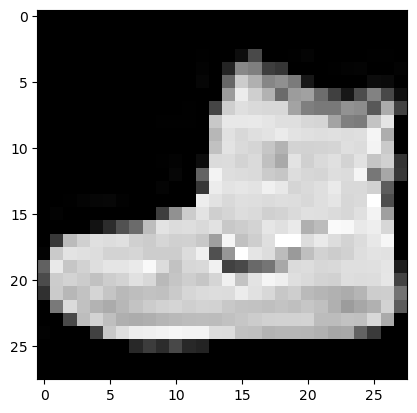

In [7]:
%matplotlib inline
plt.imshow(image.squeeze(), cmap=plt.cm.gray)

In [8]:
# Converting dataset to dataloader because it is easier for iteration process
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [9]:
# Length of the dataloader totally depends on the batch size
# Approximately the size of the dataloader = size of the dataset / size of the batch
print(len(trainDataLoader))
print(len(testDataLoader))

938
157


torch.Size([64, 1, 28, 28]) torch.Size([64])


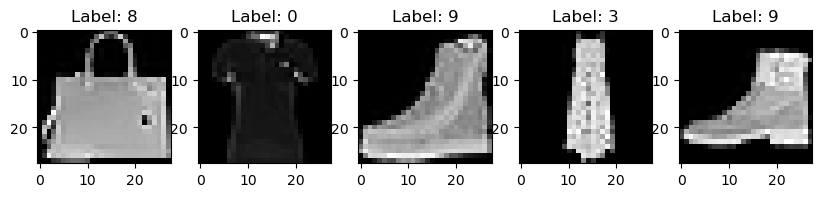

In [10]:
# The 'iter' function goes through training dataloader
images, labels = next(iter(trainDataLoader))
print(images.shape, labels.shape)
plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze(),cmap=plt.cm.gray)

In [11]:
# Building Model
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    # Input size and Output vector size (10 corresponds to the probability of each label)
    self.linear = torch.nn.Linear(28*28, 10)
  
  def forward(self, x):
    x = x.view(-1, 28*28) # change so 784 vector instead of 28x28 matrix
    return self.linear(x)



In [12]:
# My PyTorch doesn't support .cuda()
model = LinearReg() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method

In [13]:
# How good our model is going to be
train_loss_history = []
test_loss_history = []

for epoch in range(20):
    train_loss = 0.0
    test_loss = 0.0
    
    # we are interested in updating trainable parameters
    model.train()
    for i, data in enumerate(trainDataLoader):
        # If the model was on the GPU image also need to be on GPU
        images, labels = data
        images = images
        labels = labels
        # zero out any gradient values from the previous iteration
        optimizer.zero_grad() 
        # forward propagation - as long as we feed image to model it will do the forward computation
        predicted_output = model(images) 
        # calculate our measure of goodness
        fit = loss(predicted_output, labels)
        # backpropagation
        fit.backward() 
        # update the weights of our trainable parameters
        optimizer.step() 
        train_loss += fit.item()
        
    # we are interested in evaluation
    model.eval()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            images = images
            labels = labels
            predicted_output = model(images)
            fit = loss(predicted_output, labels)
            test_loss += fit.item()
        
    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    train_loss_history += [train_loss]
    test_loss_history += [test_loss]
    print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')


Epoch 0, Train loss 0.9653199215306402, Test loss 0.7418118166695734
Epoch 1, Train loss 0.668017591462969, Test loss 0.6469748060035098
Epoch 2, Train loss 0.6035045332936589, Test loss 0.6032149347530049
Epoch 3, Train loss 0.5685834880195447, Test loss 0.577733262708992
Epoch 4, Train loss 0.5457289032717504, Test loss 0.5598194291637202
Epoch 5, Train loss 0.5292856577299297, Test loss 0.548134542194901
Epoch 6, Train loss 0.5163042280973911, Test loss 0.5360763845550027
Epoch 7, Train loss 0.5062248534294588, Test loss 0.5294529167330189
Epoch 8, Train loss 0.49764585744406875, Test loss 0.5220306382817068
Epoch 9, Train loss 0.490801853316425, Test loss 0.5150498996494682
Epoch 10, Train loss 0.48459836386287136, Test loss 0.5101181373095057
Epoch 11, Train loss 0.47942008937536273, Test loss 0.5084059135929034
Epoch 12, Train loss 0.47427857243048865, Test loss 0.5064294795701458
Epoch 13, Train loss 0.47058008935278667, Test loss 0.49879078842272423
Epoch 14, Train loss 0.46643

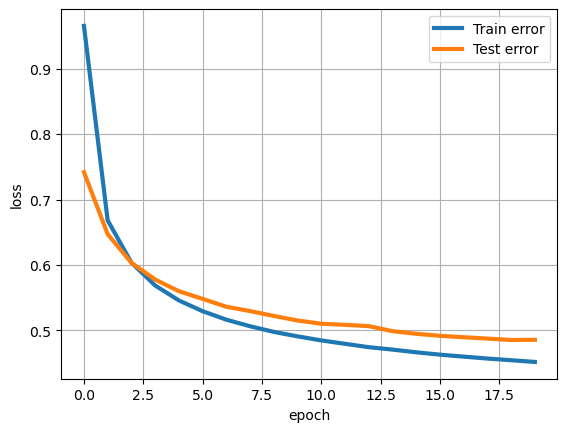

In [14]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
predicted_outputs = model(images)
predicted_classes = torch.max(predicted_outputs, 1)[1]
print('Predicted:', predicted_classes)
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())

Predicted: tensor([3, 1, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])
True labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])
0.3044168949127197


Text(0.5, 1.0, 'Pred: 2, True: 4')

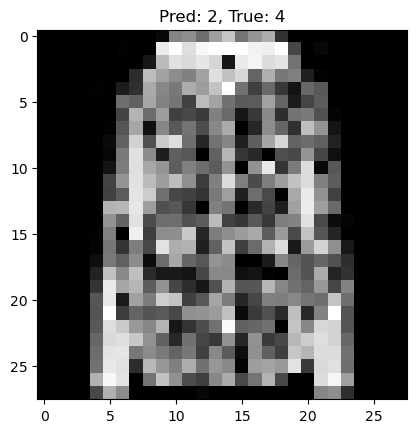

In [17]:
# Showing images that incorrectly have been detected
plt.imshow(images[5].squeeze(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[5].item()}, True: {labels[5].item()}')